In [1]:
import pandas as pd

## Fitting into classification datasets
### We split training (80%) and testing (20%) dataset and preprocess to normalize the data With logistic regression, we can achieve reasonable accuracy around 90% for both both Binary& Multivariant classification problem

### According to the accuracy and the confusion matrix, when compared with sklearn implementation, it performs slightly worse than sklearn. When number of classes is 2, the gap is minimal. when the number of classes increase, our own implemenation gets worser. It's mostly because we are using Multi-Label classficiation (MLC) while sklearn uses Multi-Class classficiation (MCC). Our own implementaion assumes different classes are independent of each other, while MCC assumes you can always only pick one class, which is more suited for this problem. 

Datasets: 2F_2C.csv
own imple accuracy: 0.951 variance: 0.8037891802924181
[[983  51]
 [ 47 919]]
sklearn implementation accuracy: 0.9495 variance: 0.7977672189050543
[[983  51]
 [ 50 916]]


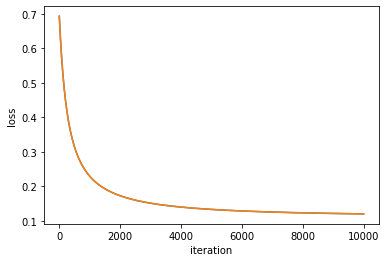

Datasets: 3F_3C.csv
own imple accuracy: 0.937 variance: 0.8230557655312563
[[955   7  26]
 [ 63 439   0]
 [ 14  16 480]]
sklearn implementation accuracy: 0.965 variance: 0.9020421200816906
[[951  15  22]
 [ 24 476   2]
 [  0   7 503]]


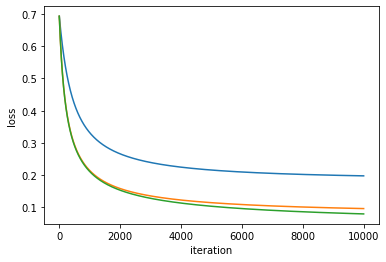

Datasets: 5F_2C.csv
own imple accuracy: 0.8785 variance: 0.5196077058774113
[[922  84]
 [159 835]]
sklearn implementation accuracy: 0.881 variance: 0.5286070298530747
[[921  85]
 [153 841]]


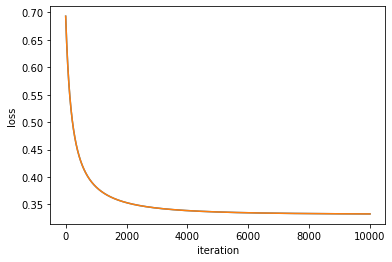

Datasets: 5F_3C.csv
own imple accuracy: 0.931 variance: 0.82693125749892
[[956   5  17]
 [ 81 441   1]
 [ 17  17 465]]
sklearn implementation accuracy: 0.9585 variance: 0.9017294174947211
[[946  16  16]
 [ 31 482  10]
 [  1   9 489]]


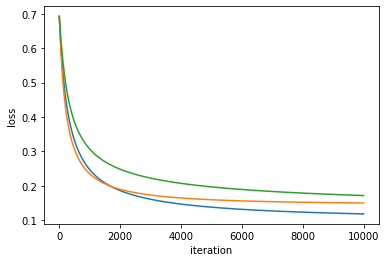

Datasets: 5F_4C.csv
own imple accuracy: 0.9075 variance: 0.6192997043474455
[[488   9   0   1]
 [ 50 463   3   1]
 [ 10   2 494   5]
 [ 94   4   6 370]]
sklearn implementation accuracy: 0.966 variance: 0.8782403444279613
[[486   6   0   6]
 [  2 507   6   2]
 [  0   0 498  13]
 [ 22   0  11 441]]


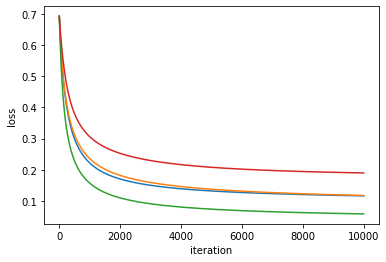

In [30]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt 
import LR

datasets = ['2F_2C.csv', '3F_3C.csv', '5F_2C.csv', '5F_3C.csv','5F_4C.csv']

accuracy = []
variance = []
for i in range(len(datasets)):
    df = pd.read_csv(datasets[i])
    X = df.iloc[:, :-1]
    Y = df.iloc[:, -1]
    
    ## Split dataset to train and test, and preprocess the data
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    scaler = preprocessing.StandardScaler().fit(X_train)

    X_train_s = scaler.transform(X_train)

    X_test_s = scaler.transform(X_test)
    
    print("Datasets: " + datasets[i])
    ## run our own  logistic regression
    lr = LR.LogisticRegresssion()
    cost = lr.fit(X_train_s, Y_train.to_numpy(), K = 10000)
    hyp_test = lr.predict(X_test_s)
    acc = accuracy_score(Y_test, hyp_test)
    var = explained_variance_score(Y_test, hyp_test)
    print("own imple accuracy: " + str(acc) + " variance: " + str(var))
    
    print(confusion_matrix(Y_test, hyp_test))
    
    
    ## run sklearn logistic regression
    clf = LogisticRegression()
    clf.fit(X_train_s, Y_train)
    
    hyp_test_c = clf.predict(X_test_s)
    acc = accuracy_score(Y_test, hyp_test_c)
    var = explained_variance_score(Y_test, hyp_test_c)
    print("sklearn implementation accuracy: " + str(acc) + " variance: " + str(var))
    
    print(confusion_matrix(Y_test, hyp_test_c))
    
    
    accuracy.append(acc)
    variance.append(var)
    
    plt.plot(cost)
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.show()
    
    
    
    

## Plot between variance and accuracy. As we can see accuracy increases along with variance when variance is small. At certain point with variance around 0.8, accuracy actually decreases slightly when variance increases. 

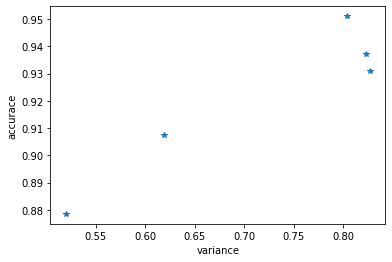

In [3]:
plt.plot(variance, accuracy, '*')

plt.xlabel("variance")
plt.ylabel("accurace")
plt.show()

### Heart Disease UCI for binary classification https://www.kaggle.com/ronitf/heart-disease-uci


In [31]:
df = pd.read_csv("heart.csv")


X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
Y.value_counts()

1    165
0    138
Name: target, dtype: int64

### Split dataset to train and test, and preprocess the data (clean up, transformation and standardlization)

### Based on the comparision results, we can see that for binary classification, we get the same accuracy and variance compared with sklearn. 

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)

X_test_s = scaler.transform(X_test)


### own implementation

In [36]:
lr = LR.LogisticRegresssion()
cost = lr.fit(X_train_s, Y_train.to_numpy(), K = 10000)
hyp_test = lr.predict(X_test_s)
acc = accuracy_score(Y_test, hyp_test)
var = explained_variance_score(Y_test, hyp_test)
print("own imple accuracy: " + str(acc) + " variance: " + str(var))    
print(confusion_matrix(Y_test, hyp_test))
print(classification_report(Y_test, hyp_test))

   

own imple accuracy: 0.8524590163934426 variance: 0.4094827586206897
[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### run sklearn logistic regression

In [37]:

clf = LogisticRegression()
clf.fit(X_train_s, Y_train)

hyp_test_c = clf.predict(X_test_s)
acc = accuracy_score(Y_test, hyp_test_c)
var = explained_variance_score(Y_test, hyp_test_c)
print("sklearn implementation accuracy: " + str(acc) + " variance: " + str(var))

print(confusion_matrix(Y_test, hyp_test_c))
print(classification_report(Y_test, hyp_test_c))

sklearn implementation accuracy: 0.8524590163934426 variance: 0.4094827586206897
[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Digit Recognizer Multivariant classification  https://www.kaggle.com/c/digit-recognizer/data?select=train.csv
### Based on the comparision results, we can see that for multiclass classification, skleran logistic regresion (91%) performs much better than our own implementation (84%). If we look at the correlation matrix and the classification report, we can see precision of digit 0 in our own implementation is pretty low. And we misclassify lots of other digits to 0. This can be caused by independant class assumption in our implementation. We treat each class as an independant class (MLC) instead of assuming there is only one class in each image (MCC). This can get worse and worse when the number of classes increase. 

In [38]:
df = pd.read_csv("train.csv")

X = df.iloc[:, 1:]
Y = df.iloc[:, 0]
df


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)

X_test_s = scaler.transform(X_test)

In [40]:
lr = LR.LogisticRegresssion()
cost = lr.fit(X_train_s, Y_train.to_numpy(), K = 10000)
hyp_test = lr.predict(X_test_s)
acc = accuracy_score(Y_test, hyp_test)
var = explained_variance_score(Y_test, hyp_test)
print("own imple accuracy: " + str(acc) + " variance: " + str(var))    
print(confusion_matrix(Y_test, hyp_test))
print(classification_report(Y_test, hyp_test))

own imple accuracy: 0.84 variance: 0.439184843025315
[[809   0   0   0   1   2   3   0   1   0]
 [ 11 885   3   0   0   2   1   0   7   0]
 [102  13 691   5  10   1   6   9   9   0]
 [139   3  25 730   1  15   2   4  11   7]
 [ 67   1   4   1 744   1   3   0   3  15]
 [106   4   2  20  11 536  14   4   3   2]
 [ 66   2   5   0  10   8 692   0   2   0]
 [ 77  10   3   3  16   2   0 765   0  17]
 [201  15   4   9   7  18   3   2 573   3]
 [156   2   0   6  14   2   0  23   4 631]]
              precision    recall  f1-score   support

           0       0.47      0.99      0.63       816
           1       0.95      0.97      0.96       909
           2       0.94      0.82      0.87       846
           3       0.94      0.78      0.85       937
           4       0.91      0.89      0.90       839
           5       0.91      0.76      0.83       702
           6       0.96      0.88      0.92       785
           7       0.95      0.86      0.90       893
           8       0.93      

In [41]:

clf = LogisticRegression()
clf.fit(X_train_s, Y_train)

hyp_test_c = clf.predict(X_test_s)
acc = accuracy_score(Y_test, hyp_test_c)
var = explained_variance_score(Y_test, hyp_test_c)
print("sklearn implementation accuracy: " + str(acc) + " variance: " + str(var))

print(confusion_matrix(Y_test, hyp_test_c))
print(classification_report(Y_test, hyp_test_c))

sklearn implementation accuracy: 0.9091666666666667 variance: 0.825145223796909
[[779   0   2   1   1  16  13   2   1   1]
 [  0 886   7   1   1   2   1   2   8   1]
 [  6  17 738  12  13   8  14  12  23   3]
 [  2   3  29 814   4  34   3   8  24  16]
 [  6   2   6   1 762   2  15   6   7  32]
 [ 13   4  10  26  13 604  19   1   9   3]
 [ 10   1  12   1   6   8 742   0   5   0]
 [  1   3   9   7  18   3   1 818   4  29]
 [  4  13   8  26   7  26   8   3 735   5]
 [  2   3   6  12  17   7   0  24   8 759]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       816
           1       0.95      0.97      0.96       909
           2       0.89      0.87      0.88       846
           3       0.90      0.87      0.89       937
           4       0.90      0.91      0.91       839
           5       0.85      0.86      0.86       702
           6       0.91      0.95      0.93       785
           7       0.93      0.92      0.92       893
  

/Users/zhaotingye/.pyenv/versions/3.7.7/envs/py377/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
